In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
%cd drive/My Drive/RMSSE

/content/drive/My Drive/RMSSE


In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("prepro_data.csv")
train = df[df.dn < 1886]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
train_act = train[['demand']]
train_value = train_act.to_numpy()
print(train_value)
train_value.flatten()
print(len(train_value))

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [3]]
5747365


In [7]:
true = df[df.dn >= 1914]
true = true[['demand']].to_numpy()

In [8]:
true_plot = df[df.dn >= 1914]

In [9]:
print(true)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [5]]


In [10]:
pred_df = pd.read_csv("pred_23.csv")
print(pred_df)

       Unnamed: 0         0
0               0  0.737354
1               1  0.308786
2               2  0.756930
3               3  1.225388
4               4  1.567861
...           ...       ...
85367       85367  0.911778
85368       85368  0.750784
85369       85369  1.316207
85370       85370  0.832068
85371       85371  4.050935

[85372 rows x 2 columns]


In [11]:
pred = pred_df[['0']].to_numpy()
new_pred = np.where(pred < 0, 0,pred)

In [ ]:
print(new_pred)

[[0.9791094 ]
 [0.0381037 ]
 [0.47173178]
 ...
 [0.9750315 ]
 [0.66999304]
 [4.300677  ]]


In [42]:
def RMSSE(y_true, y_pred, y_hist):

    #y_true: 실제 값 
    #y_pred: 모델 예측 값
    #y_hist: 모델 학습에 활용된 값
    
    h, n = len(y_true), len(y_hist)

    numerator = np.sum((y_true - y_pred)**2)
    denominator = (1/(n-1))*np.sum((y_hist[1:] - y_hist[:-1])**2)
    
    msse = (1/h) * (numerator/denominator)
    rmsse = msse ** 0.5
    
    return rmsse

In [43]:
pred = new_pred.flatten()

In [44]:
true = true.flatten()

In [45]:
#TCN 예측 모델의 RMSSE 도출
result = RMSSE(true, pred, train_value)

In [46]:
print(result)

0.4329377052678959


In [17]:
winner = pd.read_csv("winner_value.csv")
print(winner)

       Unnamed: 0    demand
0               0  0.842009
1               1  0.219971
2               2  0.487632
3               3  1.444170
4               4  0.956701
...           ...       ...
85367       85367  1.553969
85368       85368  1.051492
85369       85369  1.097731
85370       85370  1.070719
85371       85371  5.594886

[85372 rows x 2 columns]


In [47]:
winner_pred = winner['demand'].to_numpy()
print(winner_pred)

[0.84200928 0.21997111 0.48763171 ... 1.09773068 1.07071929 5.59488628]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

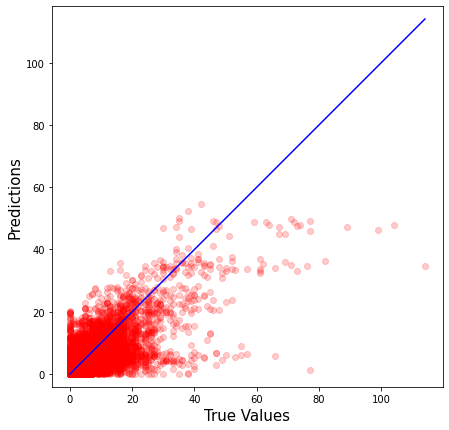

In [40]:
#TCN 예측 모델의 예측값 시각화
plt.figure(figsize=(7, 7))
plt.scatter(true, pred, c='red', alpha=0.2)

p1 = max(max(pred), max(true))
p2 = min(min(pred), min(true))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

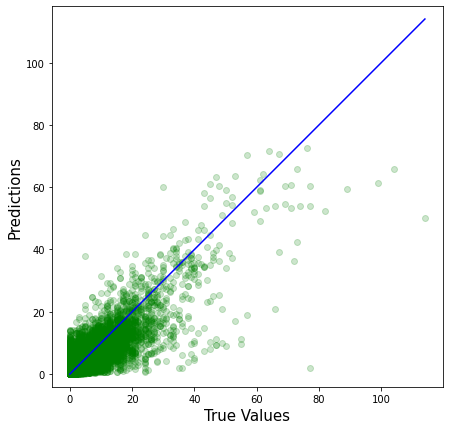

In [48]:
# 1위 예측 모델의 예측값 시각화
plt.figure(figsize=(7, 7))
plt.scatter(true, winner_pred, c='green', alpha=0.2)

p1 = max(max(pred), max(true))
p2 = min(min(pred), min(true))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

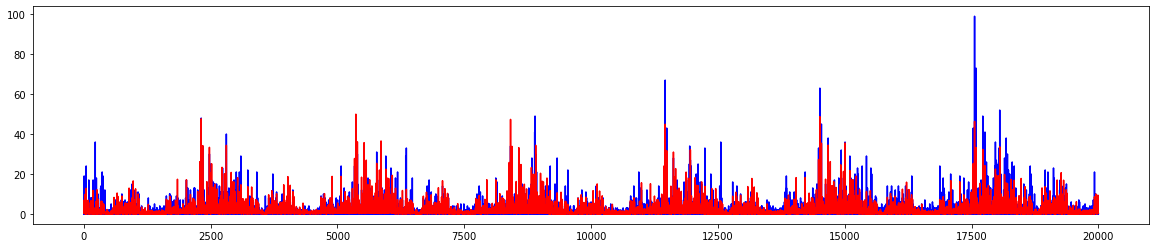

In [34]:
#TCN 예측 모델의 예측 성능 시각화
fig = plt.figure(figsize = (20, 4))
chart = fig.add_subplot(1,1,1)
chart.plot(true[0:20000], color='blue' , label='true')
chart.plot(pred[0:20000], color='red' , label='pred')

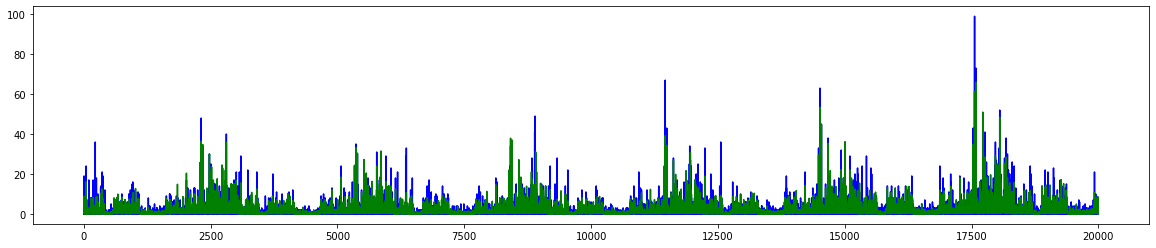

In [35]:
#1위 예측 모델의 예측 성능 시각화
fig = plt.figure(figsize = (20, 4))
chart2 = fig.add_subplot(1,1,1)
chart2.plot(true[0:20000], color='blue' , label='true')
chart2.plot(winner_pred[0:20000], color='green' , label='1st price')